## Training Data Display and Analysis
This is notebook is for viewing the data gathered during training runs of our agent. We're currently only supporting one traning file, but in the future we're probably going to split the data up into multiple files.


In [20]:
import numpy as np
import matplotlib
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt

BRD_HEIGHT = 20
BRD_WIDTH = 10

data = np.load('training_data.npy').item()

print("Games Played: " + str(len(data['Value'])))
print("States in database: " + str(data['Reward'][0]))
print("Average reward: " + str(data['Reward'][1]))
print("Average when we don't increase block height: " + str(data['R|NotUp'][1]))
print("Average when we increase block height: " + str(data['R|Up'][1]))
print("Average when we cover blocks: " + str(data['R|Cover'][1]))

i = 1
while True:
    tag = "R|Lines_Cleared_" + str(i)
    if tag in data:
        print("Average when we clear " + str(i) + " lines: " + str(data[tag][1]))
    else:
        break
    i = i + 1
    
print("\nMax Value: " + str(np.max(data['Value'])))
print("Min Value: " + str(np.min(data['Value'])))

Games Played: 1032
States in database: 45575
Average reward: 2.45873834339
Average when we don't increase block height: 23.4094609123
Average when we increase block height: -3.72864548118
Average when we cover blocks: -0.512340008574
Average when we clear 1 lines: 21.197681906
Average when we clear 2 lines: 39.1791255289
Average when we clear 3 lines: 57.4025974026
Average when we clear 4 lines: 73.0

Max Value: 724
Min Value: -168


A colored graph representation of our average board state

Proper Tetris Plot


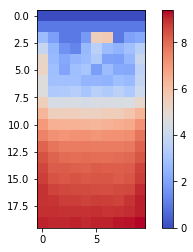

Representation in the Agent


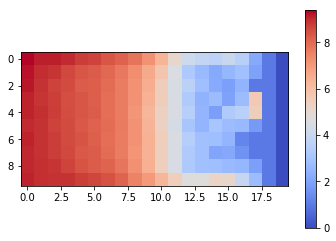

In [14]:
brd = data['Board']
grid = np.zeros((20,10))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[j][i] = brd[i,j,1]
            
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()

print("Proper Tetris Plot")
plt.show()

grid = np.zeros((10,20))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[9 - i][19 - j] = brd[i][j][1]

print("Representation in the Agent")
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()
plt.show()

Learning Curve

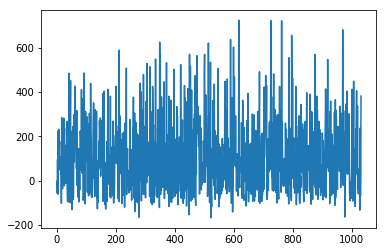

In [15]:
plt.plot(data['Value'])
plt.show()